# Week 4 -  CONFIDENCE INTERVALS - 01.02

## Project Challenges: 01.02





For the bikes data set, calculate the 95% confidence intervals for the mean of the windspeed feature using bootstrapping. Create a notebook in which following questions shall be solved:


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
bike_data = pd.read_csv('../data/bikes_clean.csv', parse_dates=True, index_col=0)

In [36]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,1,2011,morning


In [37]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        17379 non-null  int64  
 11  hour_of_day  17379 non-null  int64  
 12  month        17379 non-null  int64  
 13  year         17379 non-null  int64  
 14  part_of_day  17379 non-null  object 
dtypes: float64(5), int64(9), object(1)
memory usage: 2.1+ MB


In [38]:
bike_data.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-12-07 08:00:00,4,0,1,3,18.04,21.970,100,0.0000,6.0,80.0,86,8,12,2011,afternoon
2012-07-09 12:00:00,3,0,1,2,30.34,34.090,58,8.9981,61.0,205.0,266,12,7,2012,afternoon
2011-07-27 11:00:00,3,0,1,1,32.80,34.850,31,0.0000,NaN,NaN,208,11,7,2011,afternoon
2012-06-24 22:00:00,3,0,0,1,30.34,34.090,55,7.0015,NaN,NaN,269,22,6,2012,night
2011-08-15 11:00:00,3,0,1,2,29.52,34.090,62,16.9979,41.0,112.0,153,11,8,2011,afternoon
2012-11-26 21:00:00,4,0,1,1,13.94,18.180,49,0.0000,NaN,NaN,128,21,11,2012,night
2012-07-11 12:00:00,3,0,1,2,31.98,34.850,43,0.0000,69.0,223.0,292,12,7,2012,afternoon
2011-03-01 09:00:00,1,0,1,1,9.02,9.850,55,27.9993,8.0,116.0,124,9,3,2011,afternoon
2011-09-26 04:00:00,4,0,1,2,25.42,27.275,94,6.0032,NaN,NaN,6,4,9,2011,morning


In [39]:
#1.Initialize empty list called sample_means()

In [40]:
sample_means = []

In [41]:
#2.Create a for loop that will loop 10,000 times

In [42]:
bike_data_windspeed = bike_data['windspeed']

In [43]:
bike_data_windspeed.sample(10)

datetime
2012-10-16 09:00:00    16.9979
2012-11-13 09:00:00    22.0028
2011-04-15 05:00:00     7.0015
2011-05-03 16:00:00    31.0009
2011-08-24 22:00:00    23.9994
2012-01-09 21:00:00     0.0000
2012-08-14 11:00:00     0.0000
2012-07-08 11:00:00    19.9995
2011-11-22 18:00:00     0.0000
2012-07-18 22:00:00     6.0032
Name: windspeed, dtype: float64

In [44]:
#3.In each iteration using the pandas method .sample() sample 100 windspeeds with replacement

In [45]:
bike_data_windspeed.sample(n=100, replace=True).mean()

11.930623

In [46]:
#4.Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list

In [47]:
for i in range(10_000):
    bootstrap_mean = bike_data_windspeed.sample(n=100, replace=True).mean()
    sample_means.append(bootstrap_mean)

In [33]:
sample_means[:10]

[12.750434999999998,
 12.350043000000001,
 12.440359,
 12.560289000000003,
 12.680219,
 14.350394999999999,
 12.820517,
 12.640287000000002,
 13.280137,
 12.660453999999998]

In [ ]:
#5.Using sns.displot plot the distribution of the sample_means list

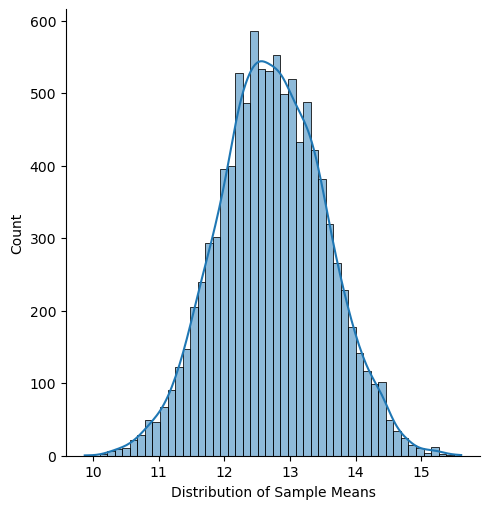

In [53]:
sns.displot(data=sample_means, bins=50, kde=True)
plt.xlabel("Distribution of Sample Means");

In [ ]:
#6.Convert sample_means list to pandas Series

In [55]:
sample_means_series = pd.Series(sample_means)

In [ ]:
#7.Using pandas .quantile() calculation the upper (0.975) and lower (0.025) limits of the 
#confidence interval of the sample_means Series


In [ ]:
alpha = 0.95

